<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/2ndWeekTasks/2_Linear_Regression_on_Salary_Prediction_Fadhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fadhil Dzikri Aqila

NIM : 1103213136

Lecture 2 : Linear Regression on Salary Prediction

Dataset : Salary_Data_Simple_SVR.csv

Dokumentasi Chatgpt : [Link](https://chat.openai.com/share/e4ed9bba-4a5e-40d1-91eb-c2a65da3e43b)

## Prompt ChatGPT : beri kode untuk menyambungkan google drive dengan google colab

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Prompt ChatGPT : Ingin membuat model linear regression dengan dataset Salary_Data_Simple_SVR.csv bagaimana tahapannya?

In [65]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Step 1: Membaca file CSV dari Google Drive
data = pd.read_csv('/content/drive/MyDrive/Dataset/Salary_Data_Simple_SVR.csv')

In [67]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [68]:
# Step 2: Memisahkan fitur dan target
X = data[['YearsExperience']] # fitur (Pengalaman kerja)
y = data['Salary'] # Target (Gaji)

In [69]:
# Step 3: Memisahkan dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Step 4: Membuat model linear regression
model = LinearRegression()

In [71]:
# Step 5: Latih model di training set
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Step 6: Membuat prediksi di set test
y_pred = model.predict(X_test)

In [73]:
# Step 7: Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


## Prompt ChatGPT : beri kode untuk melakukan evaluasi dengan menggunakan RMSE, MAE, MAPPE, R2

In [74]:
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Menampilkan hasil perhitungan
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
R-squared (R2): 0.9024461774180497


## Prompt ChatGPT : Bagaimana cara memvisualisasikan data train, data test, dengan garis regresi dari modelnya?

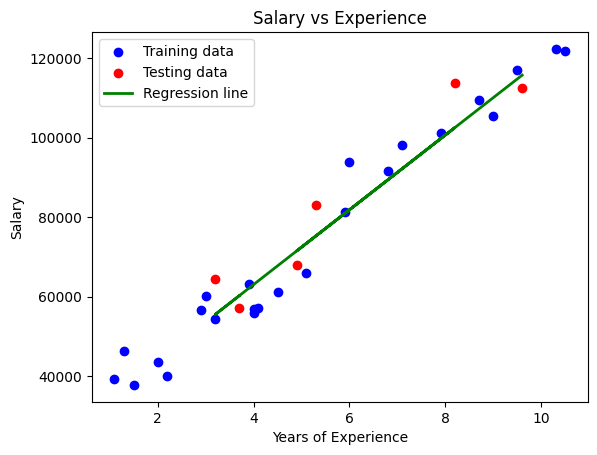

In [75]:
# Plot data train
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot data test
plt.scatter(X_test, y_test, color='red', label='Testing data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression line')

plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Prompt ChatGPT : Bagaimana cara mengetahui berapa nilai actual dari data test, dengan nilai prediksi dari model? juga tampilkan kolom YearsExperience

   YearsExperience  ActualSalary  PredictedSalary
0              9.6      112635.0    115790.210113
1              4.9       67938.0     71498.278095
2              8.2      113812.0    102596.868661
3              5.3       83088.0     75267.804224
4              3.2       64445.0     55477.792045
5              3.7       57189.0     60189.699707


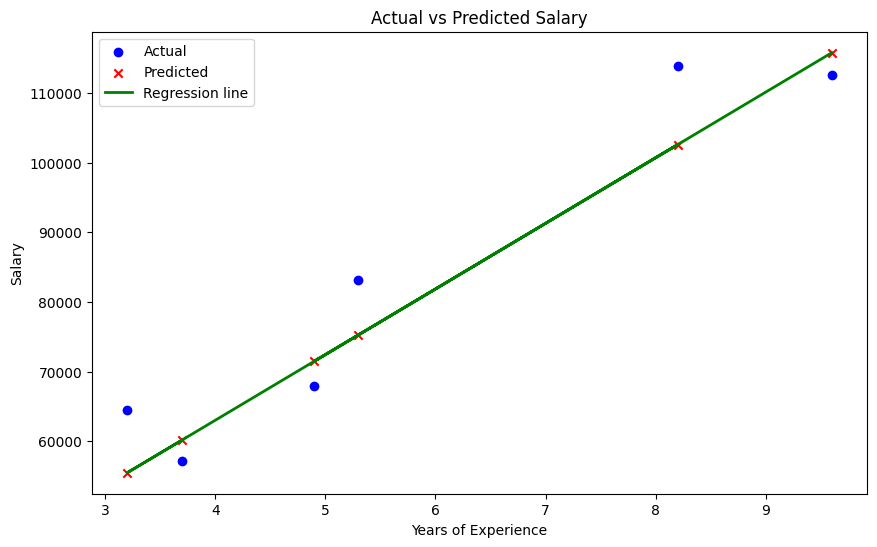

In [76]:
# Buat DataFrame untuk menampilkan actual dan predicted values
df_results = pd.DataFrame({'YearsExperience': X_test['YearsExperience'].values.flatten(),
                            'ActualSalary': y_test.values.flatten(),
                            'PredictedSalary': y_pred.flatten()})

print(df_results)

# Plotting hasilnya
plt.figure(figsize=(10, 6))
plt.scatter(df_results['YearsExperience'], df_results['ActualSalary'], color='blue', label='Actual')
plt.scatter(df_results['YearsExperience'], df_results['PredictedSalary'], color='red', marker='x', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Actual vs Predicted Salary')
plt.show()

## Prompt ChatGPT : Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukkan

In [77]:
# Input data baru (misalnya, pengalaman 10 tahun)
new_data = np.array([[10]])

# Prediksi nilai gaji untuk data baru
predicted_salary = model.predict(new_data)

print(f'Predicted salary for 10 years of experience: {predicted_salary[0]}')

Predicted salary for 10 years of experience: 119559.73624208657


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
